### 1. De un lote que contiene 15 artı́culos, de los cuales 4 son defectuosos, se eligen 3 artı́culos al azar con reposición. Si llamamos X al número de artı́culos defectuosos entre los seleccionados

[1] 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1

simu
      0       1       2       3       4       5 
0.21080 0.38604 0.28019 0.10314 0.01849 0.00134 

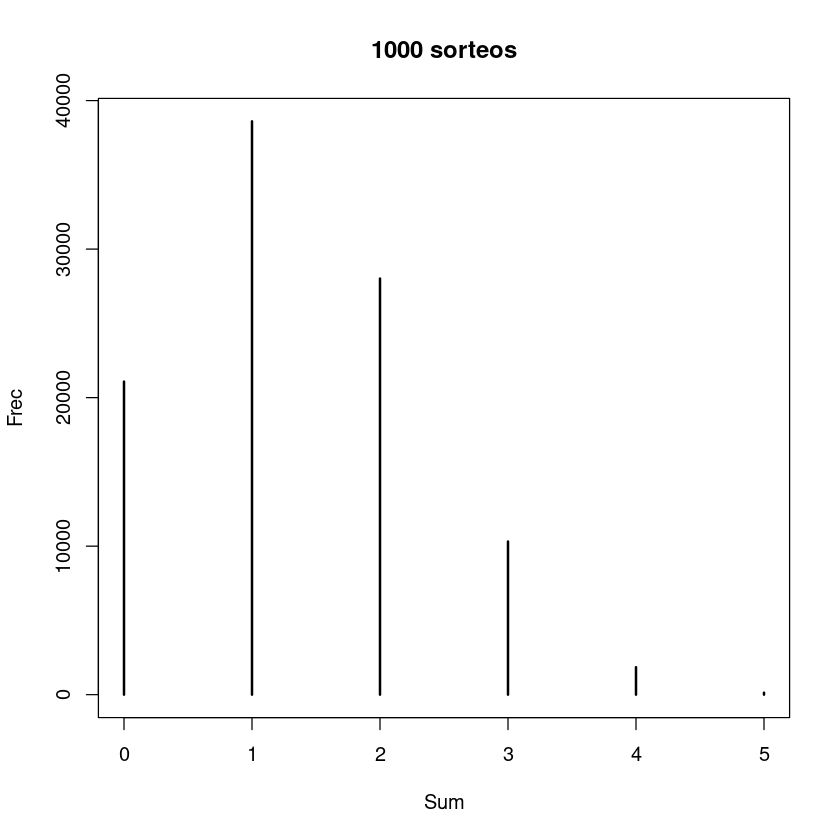

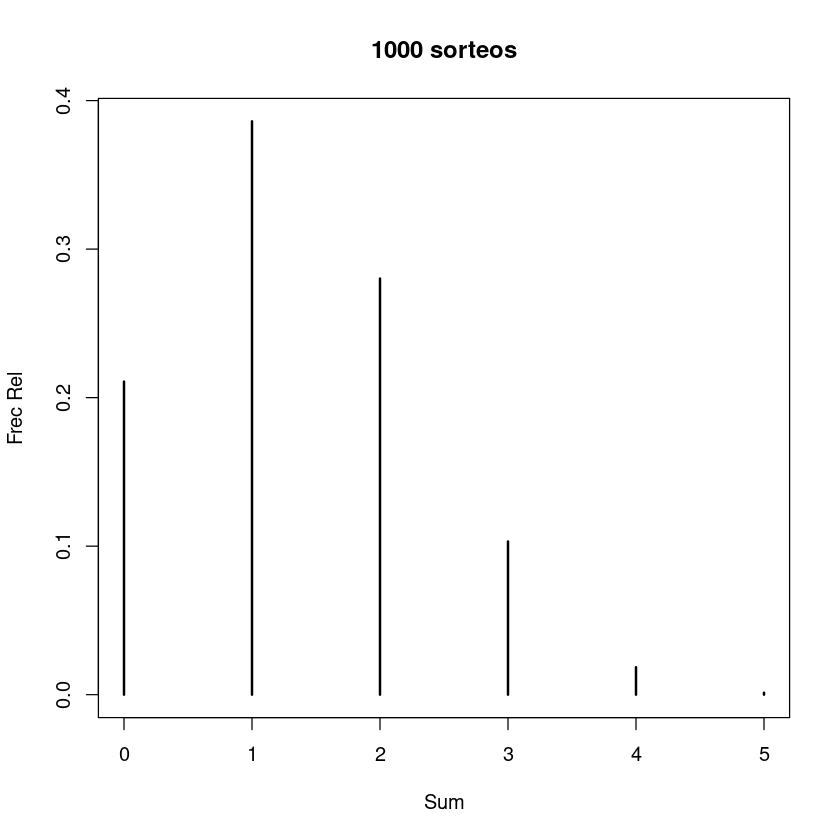

In [35]:
# a) Hallar la función de probabilidad puntual asociada a X y graficarla usando R.
buenos<-rep(0,11) # art bien
malos<-rep(1,4) # arts defectuosos
todos<-append(buenos,malos)
todos

sorteo <-function(){
  suma <- sample(x = todos, size = 5, replace = TRUE) # tomamos una muestra y sumamos el puntaje
  total<-sum(suma)
  return(total)
}

n <- 100000
simu<-replicate(n,sorteo()) # lo hacemos n veces

# Tabla de probabilidad puntual
table(simu)/length(simu)

# su grafico en frec y frec rel
plot(table(simu), xlab = 'Sum', ylab = 'Frec', main = '1000 sorteos')
plot(table(simu)/length(simu), xlab = 'Sum', ylab = 'Frec Rel', main = '1000 sorteos')

In [46]:
# b) ¿Cuál es la probabilidad de que al menos 2 artı́culos sean defectuosos?
sorteo2 <-function(){
  suma <- sample(x = todos, size = 5, replace = TRUE) # tomamos una muestra y sumamos el puntaje
  total<-sum(suma)

  s <- total > 1
  return(s)
}
n <- 10000
simu2<-replicate(n,sorteo2()) # lo hacemos n veces
z<-table(simu2)/length(simu2)
z

simu2
 FALSE   TRUE 
0.5948 0.4052 

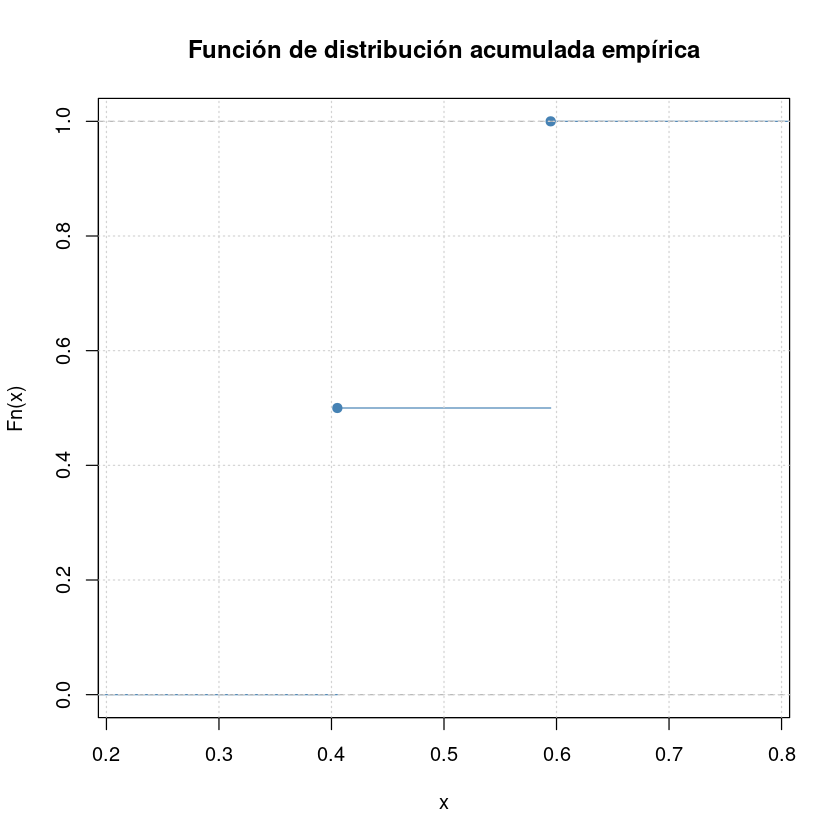

In [49]:
#c) Hallar la función de distribución acumulada de X y graficarla usando R.

plot(ecdf(z),col='steelblue', main="Función de distribución acumulada empírica")
grid()

### 9. El 70% de las consultas de un sistema interactivo de computación requiere de acceso a bases de datos. Un sistema recibe 25 consultas independientes unas de otras,


#### a) ¿cuál es la probabilidad de que:
##### i. exactamente 20 consultas requieran acceso a una base de datos?
##### ii. el número de consultas que requieran acceso a una base de datos esté entre 20 y 24 inclusive?
#### b) Calcular el valor esperado y la varianza del número de consultas que requieren acceso a una base de datos.

In [60]:
# a)
# X ~ Bi(20,0.7)
cat("i:",dbinom(20,25,0.7))
cat("\nii:",sum(dbinom(20:24,25,0.7)))

i: 0.1030165
ii: 0.1933543

In [66]:
# b)
cat("E: ", 25*0.7)
cat("\nV: ", 25*0.7*(1-0.7))

E:  17.5
V:  5.25

### 11. Para verificar si se cumplen las normas establecidas para arrojar residuos al rı́o Re-conquista, un inspector visita al azar 10 de las 50 industrias establecidas a orillas de dicho rı́o.
#### a) Si en realidad 35 industrias no cumplen con alguna de las normas, ¿cuál es l distribución del número de industrias visitadas que están en infracción? Calcular la probabilidad de que 6 de las industrias visitadas estén en infracción.
##### b) Si hay 500 industrias de las cuales 350 están en infracción, aproximar la distribución de (a) por una más simple. Calcular nuevamente la probabilidad de que 6 de las industrias visitadas estén en infracción.
##### c) Sea X el número de fábricas que están en infracción entre las 10 visitadas. Calcular E(X) y V (X) para las distribuciones exacta (a) y aproximada (b).

In [149]:
# a)
# X~HG(50,35,6)
dbinom(6,50,0.7)
# sum(dgeom(0:3,1/3))
(p1<-dhyper(6,35,15,10))


[1] 1.841054e-17

[1] 0.2156886

[1] 6.442282e-189

In [148]:
# b) Puede ser aprox por una binomial
dhyper(6,350,150,10)
dbinom(6,10,0.7)

(p1<-dhyper(3,31,411,9))

[1] 0.2015625

[1] 0.2001209

[1] 0.0177456

In [86]:
# c) 
cat("E: ", 10*0.7)
cat("\nV: ", 10*0.7*(0.3))

E:  7
V:  2.1

### 12. Una rueda de ruleta está dividida en 38 secciones, de las cuales 18 son rojas, 18 son negras y las 2 restantes son verdes. Sea X el número necesario de juegos hasta obtener una sección verde en jugadas independientes.

#### a) ¿Cuál es la probabilidad de que sean necesarias al menos 4 jugadas?
####  b) Hallar la función de distribución acumulada de la v.a. X.
#### c) Si fueron necesarias 7 o más jugadas, ¿cuál es la probabilidad de que se necesiten al menos 10 jugadas? Comparar con (a).
####  d) ¿Cuál es la probabilidad de que sea necesario un número impar de jugadas?
####  e) Hallar E (X) y V (X)

In [93]:
#a)
1-pgeom(3,2/38)

[1] 0.8055187

In [96]:
# c) son iguales x falta de mem
# d) 
# e)
cat("E: ", (1/(2/38)))
cat("\nV: ", (1-2/38)/(2/38)**2)

E:  19
V:  342

### 13. Si en el ejercicio anterior se define Y : número de juegos hasta obtener exactamente tres secciones verdes,
#### a) ¿qué distribución tiene la v.a. Y ?
#### b) ¿cuál es la probabilidad de que se requieran exactamente 5 jugadas?
#### c) hallar E (Y ) y V (Y ) .

In [113]:
#a 
# X~BN(3,2/38)

#b
dnbinom(38,5,2/38)

#c
cat("E: ", (3/(2/38)))
cat("\nV: ", (3*(1-2/38)/(2/38)**2))

[1] 0.005792911

E:  57
V:  1026

### 15. Un minorista ha verificado que la demanda semanal de cajones de cierto producto es una v.a. con distribución de Poisson de parámetro λ = 2. Completa su existencia los lunes por la mañana de manera de tener 4 cajones al principio de la semana. Al efectuar un análisis de la actividad de su negocio, se le plantean las siguientes preguntas:

#### a) ¿Cuál es la probabilidad de vender todo su stock durante la semana?
#### b) ¿Cuál es la probabilidad de que sea incapaz de cumplir con un pedido por lo menos?
#### c) ¿Cuál es la distribución del número de cajones vendidos en una semana?
#### d) ¿Con cuántos cajones deberı́a iniciar la semana a fin de que la probabilidad de cumplir con todos sus pedidos fuese mayor o igual que 0.99?

[1] 0.1428765

[1] 0.05265302

[1] 0.00237516

[1] 0.3815238

[1] 0.07910156

[1] 0.5625

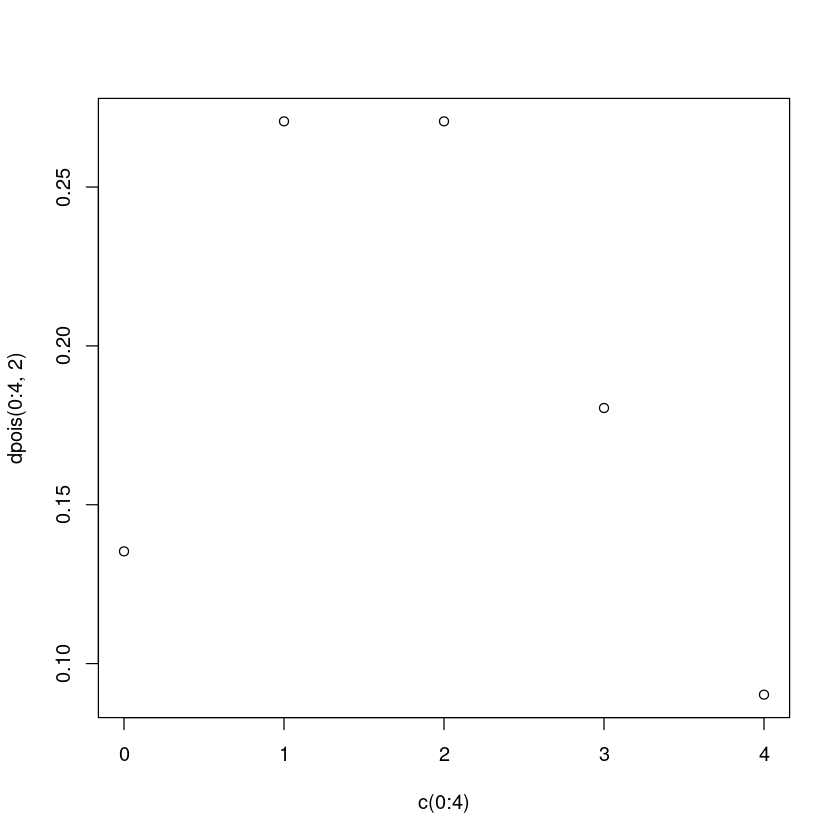

In [159]:
# a)
1-ppois(3,2)

# b)
1-ppois(4,2)

# c) 
a<-c(0:4)
b<-c(dpois(a,2))
plot(c(0:4),dpois(0:4,2))
# table(c(0:4),dpois(0:4,2))

# d)




dpois(2,1/14)
dbinom(1,14,31/442)
(dgeom(4,0.25))
1-(dgeom(0,0.25)+dgeom(1,0.25))

### 16. Un bibliotecario ubica 1000 libros en un cierto dı́a. Si la probabilidad de que un libro cualquiera sea mal ubicado es 0.001 y los libros se ubican en forma independiente, ¿cuál es la distribución aproximada del número de libros mal ubicados en ese dı́a? Utilizando esta distribución, calcular la probabilidad de que
#### a) por lo menos un libro sea mal ubicado ese dı́a.
#### b) exactamente 3 libros sean mal ubicados ese dı́a. Comparar con el valor exacto.

In [142]:
# X~P(1) ~= Bi(1000,0.001)
# a)
1-pbinom(0,1000,0.001)
1-dpois(0,1)

# b)
dbinom(3,1000,0.001)
dpois(3,1)

[1] 0.6323046

[1] 0.6321206

[1] 0.06128251

[1] 0.06131324

### 17. En un concurso de pesca cada pescador paga 100pe por participar. La cantidad de peces obtenida por cada pescador durante el desarrollo del concurso es una v.a. con distribución de Poisson de parámetro λ = 4. Hay un premio de 50pe por pieza. Cada pescador tiene permitido cobrar a lo sumo 6 piezas (es decir, aunque pesque más de 6 cobrará sólo por 6).
#### a) Calcular la función de probabilidad puntual de la ganancia neta de un pescador.
#### b) ¿Cuánto dinero espera ganar cada participante?

### 19. Las tareas llegan a una cola de un sistema de computación con un solo servidor de acuerdo con un proceso de Poisson de parámetro λ = 5 tareas por minuto. Llamemos a dicho proceso X t
#### a) ¿Cuál es la probabilidad de que en 30 segundos lleguen menos de 5 tareas?
#### b) Sea X 1 la cantidad de tareas recibidas en un minuto. Calcular:

In [147]:
# a) 
sum(dpois(0:4,5/2))

[1] 0.891178